1. Veri okuma

In [5]:
import pandas as pd

# Eğitim ve test verileri (ölçeklenmiş, PCA uygulanmamış)
train_df = pd.read_csv("dataset/train_balanced.csv")
test_df = pd.read_csv("dataset/test_scaled.csv")

# Özellik ve etiket ayırma
X_train = train_df.drop("Class", axis=1)
y_train = train_df["Class"]

X_test = test_df.drop("Class", axis=1)
y_test = test_df["Class"]

print("Eğitim verisi:", X_train.shape)
print("Test verisi:", X_test.shape)

Eğitim verisi: (398040, 30)
Test verisi: (85443, 30)


2. SVM modeli eğitimi

In [6]:
from sklearn.svm import SVC

# SVM modeli (olasılık tahmini açık olmalı!)
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Eğit
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

3. SVM modeli eğitimi ve değerlendirme

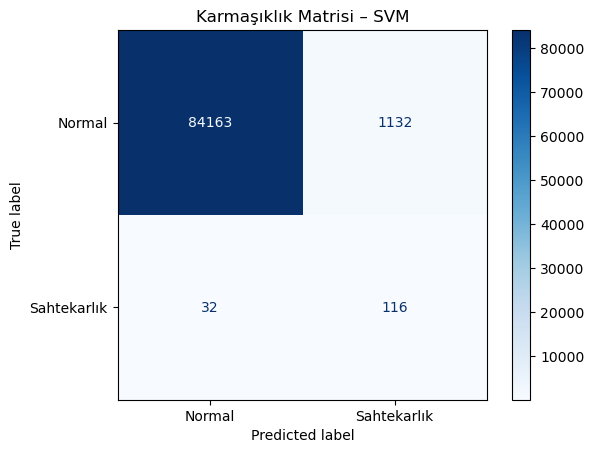

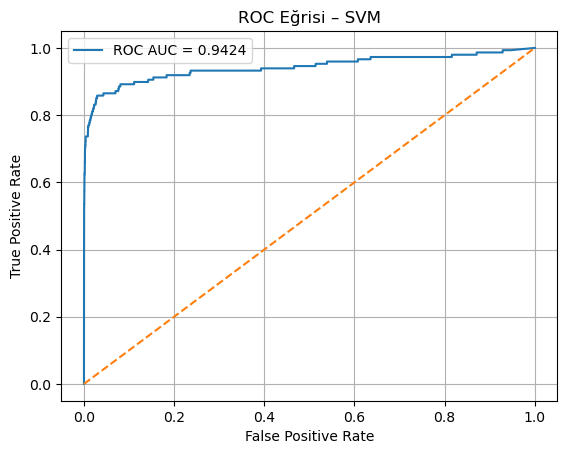

Doğruluk (Accuracy):     0.9864
Kesinlik (Precision):    0.0929
Duyarlılık (Recall):     0.7838
Özgüllük (Specificity):  0.9867
F1 Skoru:                0.1662
ROC AUC Skoru:           0.9424


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Normal", "Sahtekarlık"]).plot(cmap="Blues")
plt.title("Karmaşıklık Matrisi – SVM")
plt.show()

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – SVM")
plt.legend()
plt.grid()
plt.show()

# Metrikler
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

print(f"Doğruluk (Accuracy):     {accuracy:.4f}")
print(f"Kesinlik (Precision):    {precision:.4f}")
print(f"Duyarlılık (Recall):     {recall:.4f}")
print(f"Özgüllük (Specificity):  {specificity:.4f}")
print(f"F1 Skoru:                {f1:.4f}")
print(f"ROC AUC Skoru:           {roc_auc:.4f}")